[[   1.    0.    0. ...    0.    0.    0.]
 [-100.  201. -100. ...    0.    0.    0.]
 [   0. -100.  201. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  201. -100.    0.]
 [   0.    0.    0. ... -100.  201. -100.]
 [   0.    0.    0. ...    0.    0.    1.]]


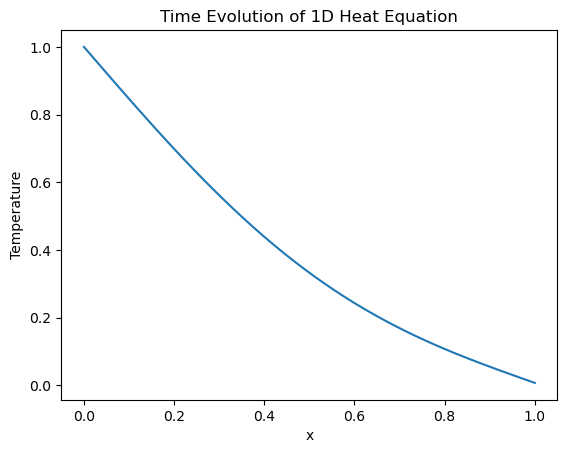

In [1]:
# We begin by considering a partial differential equation with only one
# spatial direction. This is basically a 1D boundary value once we discretise
# time.
# Consider the one dimensional heat equation
# ∂f(x,t)/∂t = ∂^2f(x,t)/∂x^2
# with boundary conditions f(0, t) = 1 and ∂_x f(1, t) = 0. This means that
# we keep the left end at temperature 1 and let no heat escape or enter at the
# right end.
# The steady state of this equation is clearly f(x, t) = 1. We will
# consider the time evolution starting from f(x, 0) = e^−5x.
# Using implicit time discretisation we have
# f_{t+dt}(x) = f_t (x) + f_{t+dt}'' (x) dt.

# Use a second order finite difference scheme to turn the above into
# a linear algebra problem using N = 1000 grid points.

#a 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of grid points
L = 1.0   # Length of the spatial domain
#T = 0.1   # Total simulation time
dt = 0.0001  # Time step

# Spatial and time step sizes
dx = L / N
nt = 1000 #int(T / dt)

# Initialize grid and initial condition
x = np.linspace(0, L, N)
f = np.exp(-5 * x)  # Initial condition

# Create tridiagonal matrix A for the finite difference scheme
A = np.zeros((N, N))
A[0, 0] = 1.0
A[N - 1, N - 1] = 1.0
for i in range(1, N - 1):
    A[i, i] = 1 + 2 * dt / dx**2
    A[i, i - 1] = -dt / dx**2
    A[i, i + 1] = -dt / dx**2
print(A)
# Time evolution
for t in range(1, nt + 1):
    f = np.linalg.solve(A, f)

# Plot the final solution
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Time Evolution of 1D Heat Equation')
plt.show()


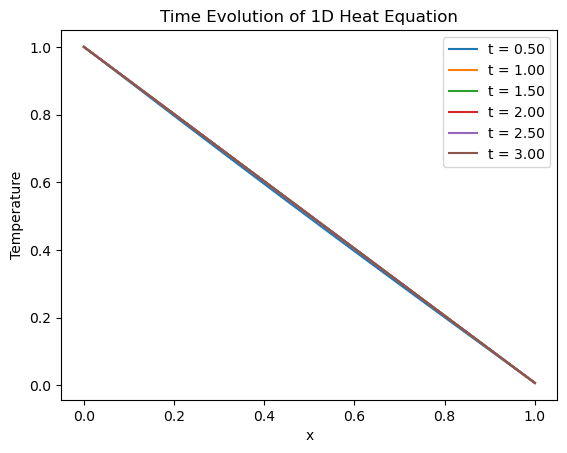

In [2]:
#b
# Solve the system using Δt = 0.05 for t ∈ [0, 3] and plot curves for
# t ∈ {0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0}.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of grid points
L = 1.0   # Length of the spatial domain
T = 3.0   # Total simulation time
dt = 0.05  # Time step

# Spatial and time step sizes
dx = L / (N - 1)
nt = int(T / dt)

# Initialize grid and initial condition
x = np.linspace(0, L, N)
f = np.exp(-5 * x)  # Initial condition

# Create tridiagonal matrix A for the finite difference scheme
A = np.zeros((N, N))
A[0, 0] = 1.0
A[N - 1, N - 1] = 1.0
for i in range(1, N - 1):
    A[i, i] = 1 + 2 * dt / dx**2
    A[i, i - 1] = -dt / dx**2
    A[i, i + 1] = -dt / dx**2

# Time evolution and plot at specified time points
plot_time_points = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

for t in range(1, nt + 1):
    f = np.linalg.solve(A, f)
    if t*dt in plot_time_points:
        plt.plot(x, f, label=f't = {t*dt:.2f}')

# Plot the final solution
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Time Evolution of 1D Heat Equation')
plt.legend()
plt.show()
